# U.S. Medical Insurance Costs

# Goals
The main goal of this project is to create a python script that will analyse a data set in a way to gain a meaningful insight into the data.

# Data
The data set being analysed is a set of data points relating to the health insurance of various users from around the USA.

As far as the developer's aware, this data was gathered ethically.

The data set contains 7 categories:
- age; Age of the user
- sex; Sex of the user
- bmi; Measure of body mass that can be used to gauge a variety of possible health conditions
- children; Number of children included in the users plan
- smoker; Has the user reported that they are a smoker?
- region; Regional location of the user
- charges; Annual cost of the insurance plan


# Analysis
Due to the nature of the data set, the obvious paths of inquiry would relate to the "charges" data point.
As this data set is related to the cost of various users health insurance, a clear analysis would be to investigate the relationship between each of the various factors of a user to their insurance cost. e.g.
- users location and it's relationship to cost
- age and it's relationship to cost
- bmi and it's relationship to cost

While a main factor can be analysed, the additional factors can't be ignored in this analysis.
The data points must be categorised and subcategorised as much as possible while still allowing for a meaningful comparison.

With this taken into account, the following data comparisons were chosen:
1. age to region
   1. Region age averages
      1. How they compare to each other
      2. How they compare to the nation average
   2. Average cost per age bracket per region
2. smoking to bmi
   1. percentage smokers per BMI bracket
      1. regional comparison
   2. comparison of costs per BMI range between smokers and non-smokers
      1. regional comparison
3. age to children
   1. per region analysis

In [8]:

import csv, math
import matplotlib.pyplot as plt


age = []
sex = []
bmi = []
children = []
smoker = []
region = []
charges = []

def parse_column_to_list(lst, file, column):
    with open(file, 'r') as csvFile:
        dataSet = csv.DictReader(csvFile)
        for row in dataSet:
            lst.append(row[column])
    return lst

def parse_file(file):
    columns = []
    with open(file, 'r') as csvFile:
        dataSet = csv.DictReader(csvFile)
        columns = dataSet.fieldnames

    for column in columns:
        parse_column_to_list(globals()[column], file, column)

def string_average(input_list):
    string_count = {}

    for string in input_list:
        if string in string_count:
            string_count[string] += 1
        else:
            string_count[string] = 1

    max_count = max(string_count.values())
    max_strings = [string for string, count in string_count.items() if count == max_count]

    unique_strings = list(string_count.keys())

    return max_strings, unique_strings

parse_file('insurance.csv')


In [ ]:
class RegionRecords:
    region = ""
    parsedData= {   "age":          -1,
                    "sex":          "None",
                    "bmi":          -1,
                    "children":     -1,
                    "smoker":       "None",
                    "charges":      -1,
                    "sex totals":   {},
                    "population":   0}

    # keys for the dictionaries are based on the id in the parsedData list
    ageDictionary = {}
    sexDictionary = {}
    bmiDictionary = {}
    childrenDictionary = {}
    smokerDictionary = {}
    chargesDictionary = {}

    def __init__ (self, region):
        self.region = region
        return

    def AddItem(self, id, age, sex, bmi, children, smoker, charges):
        self.ageDictionary[id]      = age
        self.sexDictionary[id]      = sex
        self.bmiDictionary[id]      = bmi
        self.childrenDictionary[id] = children
        self.smokerDictionary[id]   = smoker
        self.chargesDictionary[id]  = charges
        self.ParseData()

    def ParseData(self):
        self.parsedData["population"] = len(self.ageDictionary.keys())

        self.parsedData["age"] = round(sum(self.ageDictionary.values())/ len(self.ageDictionary.values()), 1)

        sex_max = []
        sex_ids = []
        sex_max, sex_ids = string_average(self.sexDictionary.values())
        if len(sex_max) > 1:
            sex_max[0] = "equal"
        self.parsedData["sex"] = sex_max[0]
        for sex in sex_ids:
            self.parsedData["sex totals"][sex] = self.sexDictionary.values().count(sex)

        self.parsedData["bmi"] = round(sum(self.bmiDictionary.values())/ len(self.bmiDictionary.values()), 1)

        self.parsedData["children"] = round(sum(self.childrenDictionary.values())/ len(self.childrenDictionary.values()), 1)

        smoker_max = []
        smoker_max, __ = string_average(self.smokerDictionary.values())
        if len(smoker_max) > 1:
            smoker_max[0] = "equal"
        self.parsedData["smoker"] = smoker_max[0]

        self.parsedData["charges"] = round(sum(self.chargesDictionary.values())/ len(self.chargesDictionary.values()), 2)
        return

    def GetParsedData(self):
        returnParsedData = self.parsedData.copy()
        return self.region, returnParsedData

In [21]:
class PatientRecords:
    national = {    "age":          -1,
                    "sex":          "None",
                    "bmi":          -1,
                    "children":     -1,
                    "smoker":       "None",
                    "region":       "None",
                    "charges":      -1,
                    "sex totals":   {},
                    "regions":      [],
                    "region totals":{},
                    "parsed":       False}

    regions = {}


    def __init__ (self, patient_age, patient_sex, patient_bmi, patient_children, patient_smoker, patient_region, patient_charges):
        self.parsed = False

        self.ageInterval = 5.0
        self.ageBrackets = {}

        self.totalAges = []
        self.totalEntries = 0

        self.patient_age = [eval(i) for i in patient_age]
        self.patient_sex = patient_sex
        self.patient_bmi = [eval(i) for i in patient_bmi]
        self.patient_children = [eval(i) for i in patient_children]
        self.patient_smoker = patient_smoker
        self.patient_region = patient_region
        self.patient_charges = [eval(i) for i in patient_charges]


    def calculateNationals(self):
        if self.national["parsed"] == True:
            return
        self.national["age"] = round(sum(self.patient_age)/ len(self.patient_age), 1)

        sex_max = []
        sex_max, __ = string_average(self.patient_sex)
        if len(sex_max) > 1:
            sex_max[0] = "equal"
        self.national["sex"] = sex_max[0]

        self.national["bmi"] = round(sum(self.patient_bmi)/ len(self.patient_bmi), 1)

        self.national["children"] = round(sum(self.patient_children)/ len(self.patient_children), 1)

        smoker_max = []
        smoker_max, __ = string_average(self.patient_smoker)
        if len(smoker_max) > 1:
            smoker_max[0] = "equal"
        self.national["smoker"] = smoker_max[0]

        region_max = []
        region_values = []
        region_max, region_values = string_average(self.patient_region)
        if len(region_max) > 1:
            self.national["region"] = region_max
        else:
            self.national["region"] = region_max[0]
        self.national["regions"] = region_values

        self.national["charges"] = round(sum(self.patient_charges)/ len(self.patient_charges), 2)

        self.national["parsed"] = True

        return

    def getNationals(self):
        returnNationals = self.national.copy()
        del returnNationals['parsed']
        return returnNationals

    # def parseRegions(self):
    #     for i in range(len(self.patient_age)):


records = PatientRecords(age,sex,bmi,children,smoker,region,charges)
records.calculateNationals()

print(records.national)

{'age': 39.2, 'sex': 'male', 'bmi': 30.7, 'children': 1.1, 'smoker': 'no', 'region': 'southeast', 'charges': 13270.42, 'sex totals': {}, 'regions': ['southwest', 'southeast', 'northwest', 'northeast'], 'region totals': {}, 'parsed': True}


## CSV to variables

In [12]:
with open('insurance.csv', 'r') as csvFile:
    dataSet = csv.DictReader(csvFile)
    for row in dataSet:
        # age to region variable loading
        region = row['region']
        age = int(row['age'])
        cost = float(row['charges'])

        if region not in ageRegion:
            ageRegion[region] = []
            ageBracketRegional[region] = {}

        ageRegion[region].append(age)

        age_bracket = int(math.ceil(age/ ageInterval) * ageInterval)

        if age_bracket not in ageBracketRegional[region]:
            ageBracketRegional[region][age_bracket] = []

        ageBracketRegional[region][age_bracket].append(cost)

        if age_bracket not in ageBracketNational:
            ageBracketNational[age_bracket] = []

        ageBracketNational[age_bracket].append(cost)

        if age_bracket not in ageBrackets:
            ageBrackets[age_bracket] = []

        ageBrackets[age_bracket].append(age)


        totalAges.append(age)
        totalEntries += 1

## Age to Region

In [13]:
for region, ages in ageRegion.items():
    aveAgeRegional[region] = round(sum(ages) / len(ages), 0)

aveAgeNational = round(sum(totalAges) / totalEntries, 0)

# Bracket averages

In [14]:
for region, age_brackets in ageBracketRegional.items():
    if region not in ageBracketRegionalAve:
        ageBracketRegionalAve[region] = {}
    for age_bracket, costs in age_brackets.items():
        if age_bracket not in ageBracketRegionalAve[region]:
            ageBracketRegionalAve[region][age_bracket] = []
        ageBracketRegionalAve[region][age_bracket] = round(sum(costs) / len(costs), 2)

for age_bracket, costs in ageBracketNational.items():
    ageBracketNationalAve[age_bracket] = round(sum(costs) / len(costs), 2)

# Output

## Globals

In [15]:
print("Age Brackets:")
for bracket in sorted(ageBrackets):
    print("\t", bracket, ":\n\t\t-", sorted(ageBrackets[bracket]))

Age Brackets:
	 20 :
		- [18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20]
	 25 :
		- [21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23

## Age to Region

In [16]:
# print the results
print("Age Region:")
for region in ageRegion:
    print("\t", region, ":\n\t\t-", sorted(ageRegion[region]))
print("Average Age Regional:")
for region in aveAgeRegional:
    print("\t", region, ":\n\t\t-", aveAgeRegional[region])
print("Average Age National:\n\t\t-", aveAgeNational)
print("Age Bracket Regional:")
for region in ageBracketRegional:
    print("\t", region, ":\n\t\t-", dict(sorted(ageBracketRegional[region].items())))

Age Region:
	 southwest :
		- [19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 22, 22, 22, 22, 22, 22, 23, 23, 23, 23, 23, 23, 23, 24, 24, 24, 24, 24, 24, 24, 25, 25, 25, 25, 25, 25, 25, 26, 26, 26, 26, 26, 26, 26, 27, 27, 27, 27, 27, 27, 28, 28, 28, 28, 28, 28, 28, 29, 29, 29, 29, 29, 29, 30, 30, 30, 30, 30, 30, 30, 31, 31, 31, 31, 31, 31, 32, 32, 32, 32, 32, 32, 33, 33, 33, 33, 33, 33, 33, 34, 34, 34, 34, 34, 34, 34, 35, 35, 35, 35, 35, 35, 35, 36, 36, 36, 36, 36, 37, 37, 37, 37, 37, 37, 38, 38, 38, 38, 38, 38, 39, 39, 39, 39, 39, 39, 39, 40, 40, 40, 40, 40, 41, 41, 41, 41, 41, 41, 42, 42, 42, 42, 42, 42, 42, 43, 43, 43, 43, 43, 43, 43, 44, 44, 44, 44, 44, 44, 45, 45, 45, 45, 45, 45, 45, 45, 46, 46, 46, 46, 46, 46, 46, 47, 47, 47, 47, 47, 47, 47, 48, 48, 48, 48, 48, 48, 49, 49, 49, 49, 49, 49, 49, 50, 50, 50, 50, 50, 50, 50, 50, 51, 51, 51, 51, 51, 5

### graphs

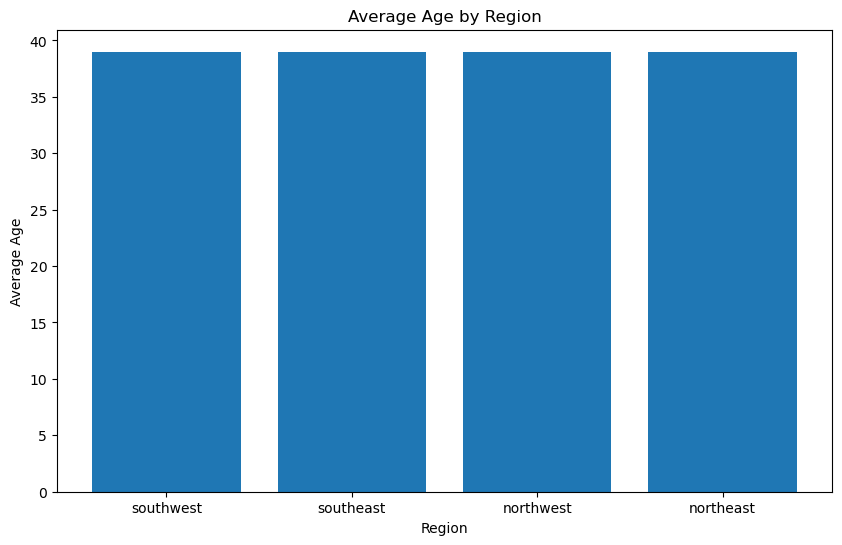

In [17]:
plt.figure(figsize=(10, 6))
plt.bar(aveAgeRegional.keys(), aveAgeRegional.values())
plt.title('Average Age by Region')
plt.xlabel('Region')
plt.ylabel('Average Age')
plt.show()

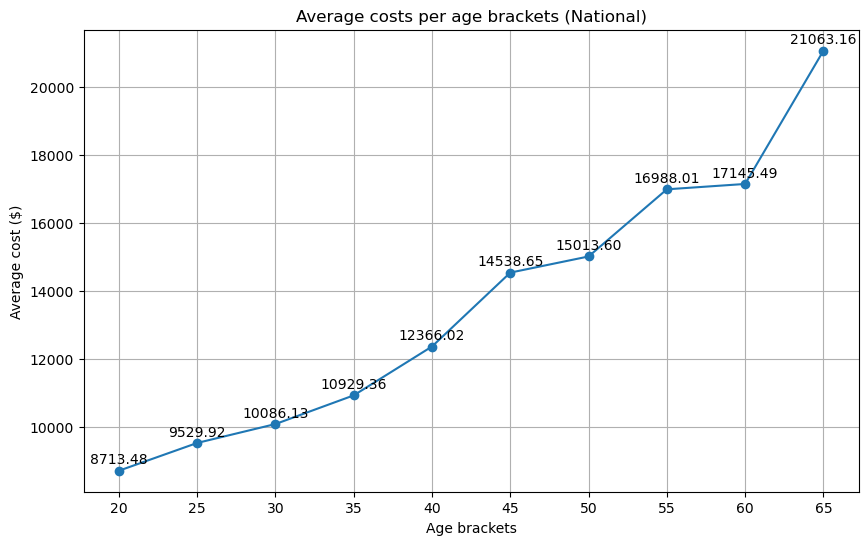

In [30]:
figures = {k: v for k, v in sorted(ageBracketNationalAve.items())}
plt.figure(figsize=(10,6))
plt.plot(figures.keys(), figures.values(), marker='o', linestyle='-')
plt.title('Average costs per age brackets (National)')
plt.xlabel('Age brackets')
plt.ylabel('Average cost ($)')
plt.xticks(range(min(figures.keys()), max(figures.keys()) + 1, 5))  # Set x-axis ticks in increments of 5
plt.grid(True)

for i, txt in enumerate(figures.values()):
    plt.annotate(f'{txt:.2f}', (list(figures.keys())[i], list(figures.values())[i]), textcoords="offset points", xytext=(0,5), ha='center')

plt.show()